<a href="https://colab.research.google.com/github/p0shivhare/AirBnb_Booking_Analysis/blob/main/Retail_Sales_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Pridiction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Piyush Shivhare
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The objective of this project is to forecast the daily sales for 1,115 Rossman stores across Europe up to six weeks in advance by employing regression models in machine learning. These models take into consideration a range of factors that impact store sales, including promotional activities, competition, holidays, seasonality, and geographical factors.

The dataset we've used for this project is a live dataset from Rossman stores. Upon analyzing the problem, it becomes evident that the Rossman challenge can be categorized as a regression problem, with the primary aim being the prediction of sales figures for Rossman stores.

Within this project, we've performed an in-depth analysis of the retail sales dataset for Rossman stores and have constructed a predictive model capable of estimating sales for any Rossman store on any given date. It's important to note that this dataset does not include personal customer information.

In the context of this project, we've covered the following key areas:

1. Analyzing the dataset through Exploratory Data Analysis (EDA).

2. Utilizing Exponential Moving Averages to study trends and seasonality within the Rossman dataset.

3. Conducting regression analyses, employing several prediction techniques:

A. Linear Regression

B. Elastic Regression (Lasso and Ridge Regression)

C. Random Forest Regression

D. AdaBoost and XGBoost

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The core objective of this project revolves around crafting a robust machine learning regression model. This model should be adept at making precise predictions of daily sales for up to six weeks in advance for a network of 1,115 Rossman stores spanning across Europe. To achieve this, the model must consider a multitude of factors that wield influence over store sales, encompassing promotions, competition, holidays, seasonality, and local dynamics.

The ultimate aim is to empower Rossman store managers with invaluable insights that guide their decisions regarding inventory management, staffing, and promotional strategies. This strategic decision-making process is expected to result in amplified sales and enhanced profitability for these businesses.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [11]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [12]:
# Load Dataset

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
ross_sale_df = pd.read_csv("/content/drive/MyDrive/Almabeller/SQL/Regressiion Analysis Data/Copy of Copy of Rossmann Stores Data.csv")
store_info_df = pd.read_csv("/content/drive/MyDrive/Almabeller/SQL/Regressiion Analysis Data/Copy of Copy of store.csv")

<ipython-input-14-5674dc0d0445>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_sale_df = pd.read_csv("/content/drive/MyDrive/Almabeller/SQL/Regressiion Analysis Data/Copy of Copy of Rossmann Stores Data.csv")


### Dataset First View

In [15]:
# Dataset First Look
# Dataset first 5 rows
ross_sale_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
# Dataset last 5 rows
ross_sale_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [17]:
# Dataset first 5 rows
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
# Dataset last 5 rows
store_info_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [19]:
# Dataset Rows & Columns count
print("Number fo rows of Rossman store data:", ross_sale_df.shape[0])
print("Number fo columns of Rossman store data:", ross_sale_df.shape[1])
print()
print("Number fo rows of Store data:", store_info_df.shape[0])
print("Number fo columns of Store data:", store_info_df.shape[1])


Number fo rows of Rossman store data: 1017209
Number fo columns of Rossman store data: 9

Number fo rows of Store data: 1115
Number fo columns of Store data: 10


### Dataset Information

In [20]:
# Dataset Info

ross_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [21]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [22]:
# Dataset Duplicate Value Count
print("Rossman Store Data haveing duplicate value:", ross_sale_df.duplicated(keep=False).sum())
print("Store Data haveing duplicate value:", store_info_df.duplicated(keep=False).sum())

Rossman Store Data haveing duplicate value: 0
Store Data haveing duplicate value: 0


In [23]:
# Rossman Store Dataset Duplicate Value Count
ross_sale_df_duplicates= ross_sale_df.duplicated().sum()

# Print the duplicate value
if ross_sale_df_duplicates==0:
  print('There is No Duplicate Value in Rossman Store Data')
else:
  print('Number of Duplicte Values : {}'.format(ross_sale_df_duplicates))

There is No Duplicate Value in Rossman Store Data


In [24]:
# Store Dataset Duplicate Value Count
store_data_duplicates= store_info_df.duplicated().sum()

# Print the duplicate value
if store_data_duplicates==0:
  print('There is No Duplicate Value in Store Data')
else:
  print('Number of Duplicte Values : {}'.format(store_data_duplicates))

There is No Duplicate Value in Store Data


#### Missing Values/Null Values

In [25]:
# Missing Values/Null Values Count
print("Rossman Store has null value count:", ross_sale_df.isnull().sum())
print()
print("Store has null value count:", store_info_df.isnull().sum())

Rossman Store has null value count: Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Store has null value count: Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


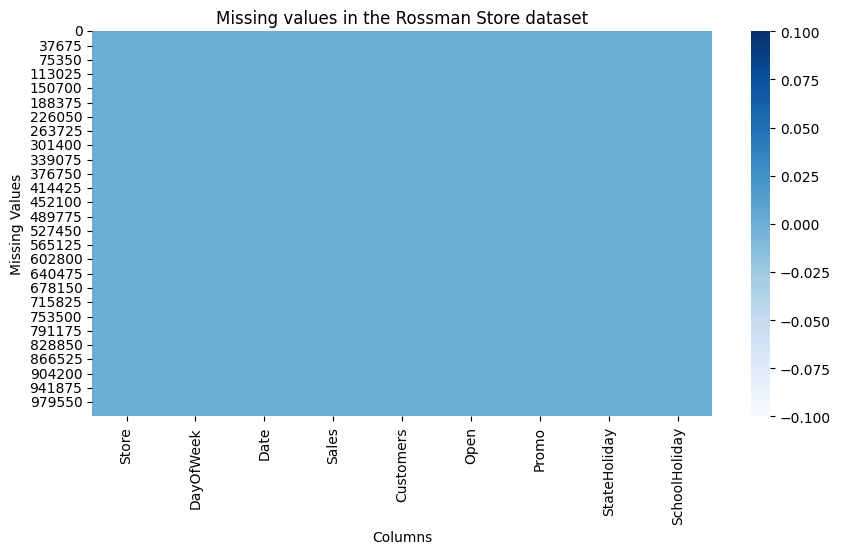

In [27]:
# Visualizing the missing values
# Rossman Store Dataset
plt.figure(figsize=(10, 5))
sns.heatmap(ross_sale_df.isnull(), cmap='Blues')

plt.title('Missing values in the Rossman Store dataset')
plt.xlabel('Columns')
plt.ylabel('Missing Values')

# Display the plot
plt.show()

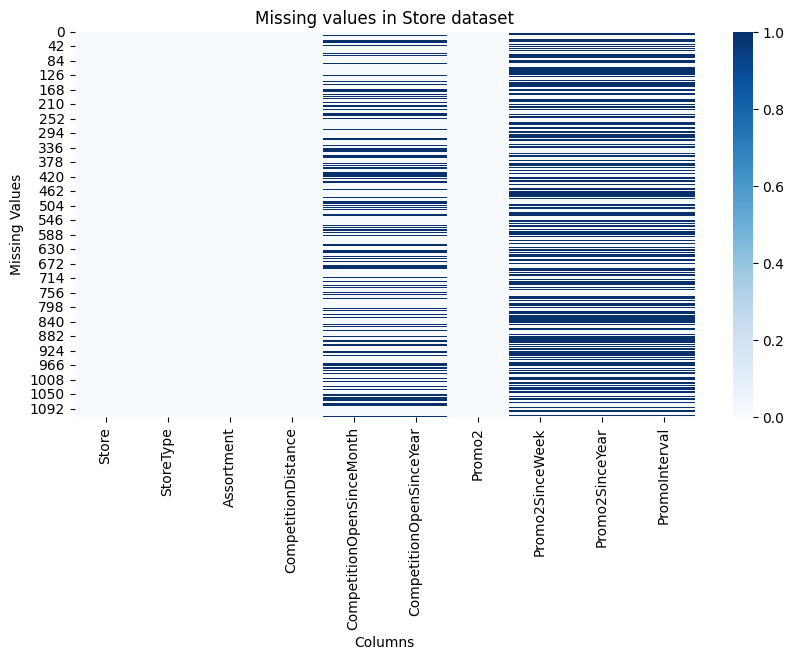

In [28]:
# Visualizing the missing values
# Store Dataset
plt.figure(figsize=(10, 5))
sns.heatmap(store_info_df.isnull(), cmap='Blues')

plt.title('Missing values in Store dataset')
plt.xlabel('Columns')
plt.ylabel('Missing Values')

# Display the plot
plt.show()

### What did you know about your dataset?

The Rossman Sale dataset (ross_sale_df) consists of a substantial 1,017,209 rows and 9 columns, providing a detailed account of daily sales information for various stores. Key metrics include store ID, day of the week, date, sales figures, customer counts, operational status, promotional activities, state holidays, and school holidays.

In comparison, the Store Information dataset (store_info_df) is more concise with 1,115 rows and 10 columns. It offers valuable insights into each store's characteristics, encompassing store type, assortment category, competition distance, competition opening details, Promo2 information, and associated promotional intervals. However, it is worth noting that some missing values are present in fields related to competition distance and promotional details.

The Rossman Sale dataset (ross_sale_df) exhibit generally clean data, with no missing values in most columns. However, the Store Information dataset does show some missing values in specific fields:

CompetitionDistance:

There are 3 missing values in the 'CompetitionDistance' column, indicating that information about the distance to the nearest competitor is not available for these particular stores.
CompetitionOpenSinceMonth and CompetitionOpenSinceYear:

The 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' columns each have 354 missing values. This suggests that data regarding the month and year when the nearest competitor opened is not available for a significant number of stores.
Promo2SinceWeek, Promo2SinceYear, and PromoInterval:

In the 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' columns, there are 544 missing values each. This implies that information about the second ongoing promotion, including its start week, start year, and interval, is not available for these stores.

## ***2. Understanding Your Variables***

In [29]:
# Dataset Columns

# Rossman Sale Dataset
print("Columns for Rossman Sale Dataset (`ross_sale_df`):")
print(ross_sale_df.columns)

# Store Information Dataset
print("\nColumns for Store Information Dataset (`store_info_df`):")
print(store_info_df.columns)

Columns for Rossman Sale Dataset (`ross_sale_df`):
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Columns for Store Information Dataset (`store_info_df`):
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [31]:
# Dataset Describe
# Rossman Sale Dataset
print("Descriptive Summary for Rossman Sale Dataset (`ross_sale_df`):")
print(ross_sale_df.describe(include='all'))

# Store Information Dataset
print("\nDescriptive Summary for Store Information Dataset (`store_info_df`):")
print(store_info_df.describe(include='all'))

Descriptive Summary for Rossman Sale Dataset (`ross_sale_df`):
               Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   



### Variables Description

### **Rossmann Stores Data.csv**
Id: Identifier representing a (Store, Date) pair within the test set.

Store: Unique identifier for each store.

Sales: Turnover for a given day (target variable for prediction).

Customers: Number of customers on a given day.

Open: Indicator for whether the store was open (0 = closed, 1 = open).

StateHoliday: Indicates a state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None).

SchoolHoliday: Indicates if the (Store, Date) was affected by the closure of public schools.

StoreType: Differentiates between 4 different store models (a, b, c, d).

Assortment: Describes the assortment level (a = basic, b = extra, c = extended).
CompetitionDistance: Distance in meters to the nearest competitor store.

CompetitionOpenSince[Month/Year]: Approximate year and month when the nearest competitor opened.

Promo: Indicates whether a store is running a promo on that day.

Promo2: Continuing and consecutive promotion for some stores (0 = not participating, 1 = participating).

Promo2Since[Year/Week]: Year and calendar week when the store started participating in Promo2.

PromoInterval: Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.

### **store.csv**

Store: Unique identifier for each store.

StoreType: Differentiates between 4 different store models (a, b, c, d).

Assortment: Describes the assortment level (a = basic, b = extra, c = extended).
CompetitionDistance: Distance in meters to the nearest competitor store.

CompetitionOpenSince[Month/Year]: Approximate year and month when the nearest competitor opened.

Promo2: Continuing and consecutive promotion for some stores (0 = not participating, 1 = participating).

Promo2Since[Year/Week]: Year and calendar week when the store started participating in Promo2.

PromoInterval: Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***